In [122]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile as sf
import music21
import math
import tkinter as tk
from tkinter import messagebox
import os
import random
from sg_functions import *

In [123]:
#####################################################################################################
############################################## DEFINES ##############################################
#####################################################################################################

SAMPLE_RATE = 44100
N_SINES = 100

TEMPO = 120
#tinyNotation_STRING = "4/4 e4. r8 d8 c# d8 r8 r4 chord{C2. e g} e1"

ADSR_DEMO_TITLE = "ADSR Functionality Graphs"

In [124]:

#####################################################################################################
############################################### MAIN ################################################
#####################################################################################################

######################################## GEN RAND NOTES #########################################

sr = 44100

#- specify info about note stream
n_amp = 1
n_k = 8
ns_length = 8 # number of notes
ns_dur = [100, 600] # note duration range

# A MAJ
# A4 (440 Hz), B4 (493.88 Hz), C5 (523.25 Hz), D5 (587.33 Hz), E5 (659.25 Hz), F#5 (739.99 Hz), G5 (783.99 Hz)
ns_options = [440, 493.88, 523.25, 587.33, 659.25, 739.99, 783.99]

# generate a list of pairs of random notes in the given scale with a random duration
ns_values = [[ns_options[random.randrange(0,len(ns_options))], random.randrange(ns_dur[0],ns_dur[1])/1000] for i in range(ns_length)]

In [125]:
######################################## GEN SIGNAL #########################################

print(ns_values)
out = generate_signals(ns_values)
hrm = out[0]
sin = out[1]
tri = out[2]
print(out[3])


[[587.33, 0.238], [783.99, 0.134], [587.33, 0.382], [659.25, 0.346], [523.25, 0.322], [659.25, 0.528], [523.25, 0.597], [739.99, 0.17]]
[[587.33, 0.238], [783.99, 0.134], [587.33, 0.382], [659.25, 0.346], [523.25, 0.322], [659.25, 0.528], [523.25, 0.597], [739.99, 0.17]]


MIDI file saved as data_rand/rand_out.mid


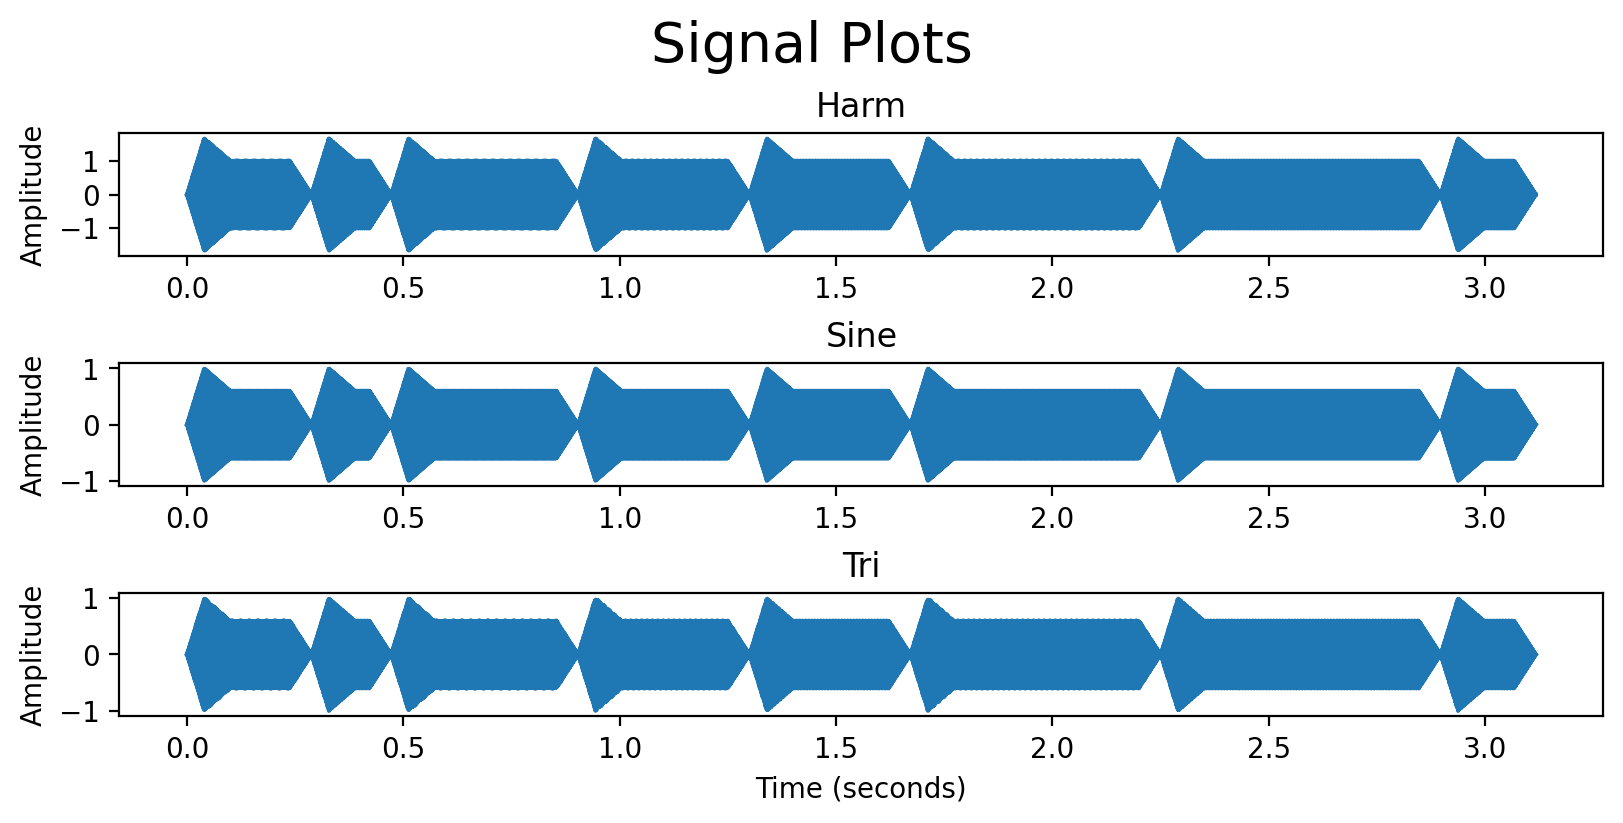

In [ ]:
######################################## MAKE WAV FILES #########################################

output_dir = "data_rand/"

with open(output_dir + "data.txt", "w") as tf:
    for n in ns_values:
        os = "{:0.2f} Hz, {:0.3f} seconds\n".format(n[0], n[1])
        tf.write(os)

create_midi_from_notes([(freq2midi(n[0]), n[1]) for n in ns_values], output_dir + "rand_midi.mid")

try:
    sf.write(output_dir + "hrm_rand.wav", hrm, sr)
except:
    sf.write("hrm_rand.wav", hrm, sr)

try:
    sf.write(output_dir + "sin_rand.wav", sin, sr)
except:
    sf.write("sin_rand.wav", sin, sr)

try:
    sf.write(output_dir + "tri_rand.wav", tri, sr)
except:
    sf.write("tri_rand.wav", tri, sr)

######################################### GRAPH OUTPUT ##########################################

PLOT_TITLE = "Signal Plots"

fig, axs = plt.subplots(3, 1, layout='constrained')

fig.align_labels()
fig.set_size_inches(8, 4)
fig.set_dpi(100)
fig.suptitle(PLOT_TITLE, fontsize=20)

axs[0].plot([i/44100 for i in range(len(hrm))], hrm)
ax = axs[0]
ax.set_title("Harm")
ax.set_ylabel("Amplitude")

axs[1].plot([i/44100 for i in range(len(sin))], sin)
ax = axs[1]
ax.set_title("Sine")
ax.set_ylabel("Amplitude")

axs[2].plot([i/44100 for i in range(len(tri))], tri)
ax = axs[2]
ax.set_title("Tri")
ax.set_ylabel("Amplitude")

ax.set_xlabel("Time (seconds)")

try:
    fig.savefig(output_dir + PLOT_TITLE + ".png")
except:
    fig.savefig(PLOT_TITLE + ".png")

#plt.show()